In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input

2024-12-19 10:09:16.462844: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 10:09:16.492868: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 10:09:16.556606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734599356.686471 4083744 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734599356.739212 4083744 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(1498, 1090, 3)
(1498, 1090)


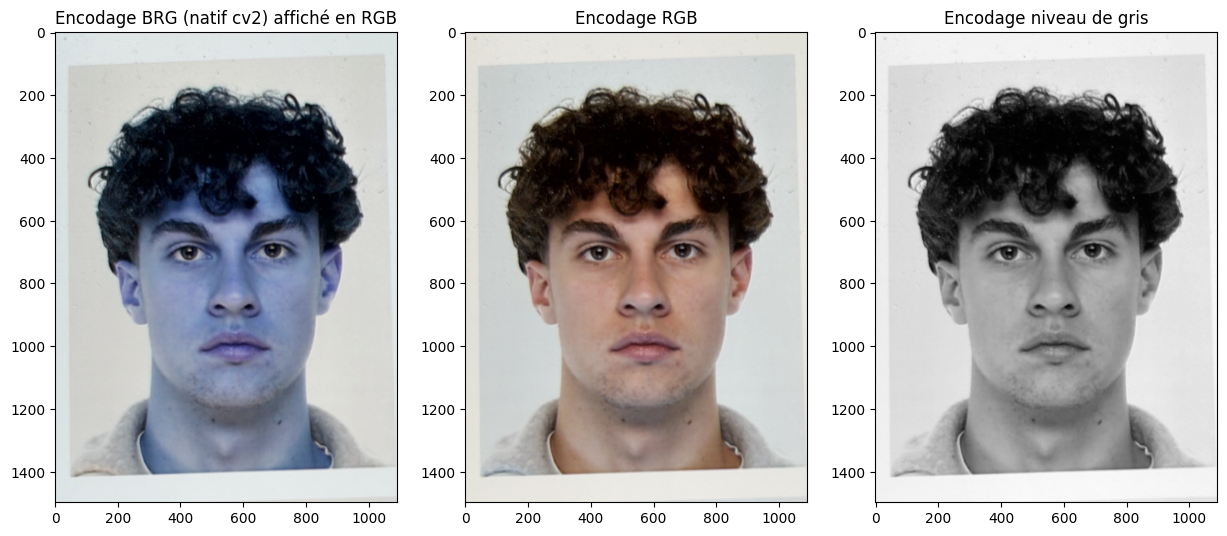

In [2]:
image = cv2.imread('IMG_4233.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
print(image_gray.shape)
fig=plt.figure(figsize=(15, 8))
fig.add_subplot(1,3, 1)
plt.title('Encodage BRG (natif cv2) affiché en RGB')
plt.imshow(image)
fig.add_subplot(1,3, 2)
plt.title('Encodage RGB')
plt.imshow(image_rgb)
fig.add_subplot(1,3, 3)
plt.title('Encodage niveau de gris')
plt.imshow(image_gray,cmap='gray')

(1498, 1090, 3)


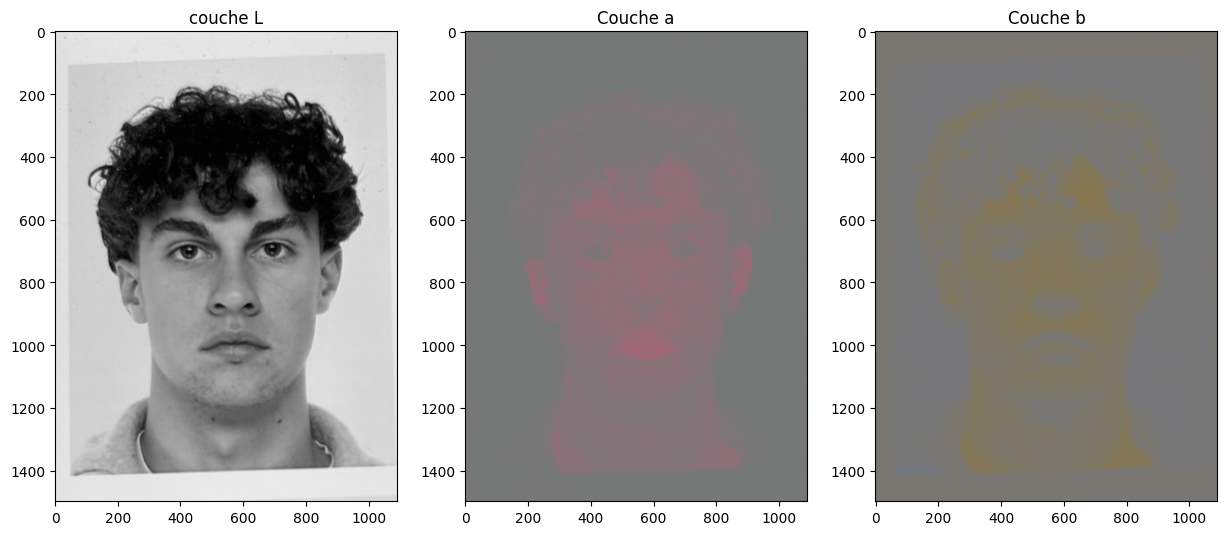

In [4]:
image_Lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
print(image_Lab.shape)
fig=plt.figure(figsize=(15, 8))
## Affichage L (on repasse en RGB noté les valeur des couches a et b à 128)
fig.add_subplot(1,3, 1)
plt.title('couche L')
image_L = image_Lab.copy()
image_L[:,:,1:]=128
image_L = cv2.cvtColor(image_L, cv2.COLOR_LAB2RGB)
plt.imshow(image_L)
## Affichage a (on repasse en RGB noté les valeurs L et b à 128)
fig.add_subplot(1,3, 2)
plt.title('Couche a')
image_a = image_Lab.copy()
image_a[:,:,0]=128
image_a[:,:,2]=128
image_a = cv2.cvtColor(image_a, cv2.COLOR_LAB2RGB)
plt.imshow(image_a)
## Affichage a (on repasse en RGB noté les valeurs L et a à 128)
fig.add_subplot(1,3, 3)
plt.title('Couche b')
image_b = image_Lab.copy()
image_b[:,:,0]=128
image_b[:,:,1]=128
image_b = cv2.cvtColor(image_b, cv2.COLOR_LAB2RGB)
plt.imshow(image_b)

2024-12-22 11:29:39.987314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 11:29:40.005061: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 11:29:40.045991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734863380.120310  139093 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734863380.141295  139093 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 11:30:04.158962: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Fa

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 153s 426ms/step - loss: 0.0242 - val_loss: 0.0097
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 154s 436ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 391ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 146s 416ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 150s 426ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 136s 387ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 126s 358ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 142s 404ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 143s 405ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 10/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 392ms/step - loss: 0.0068 - val_loss: 0.0067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


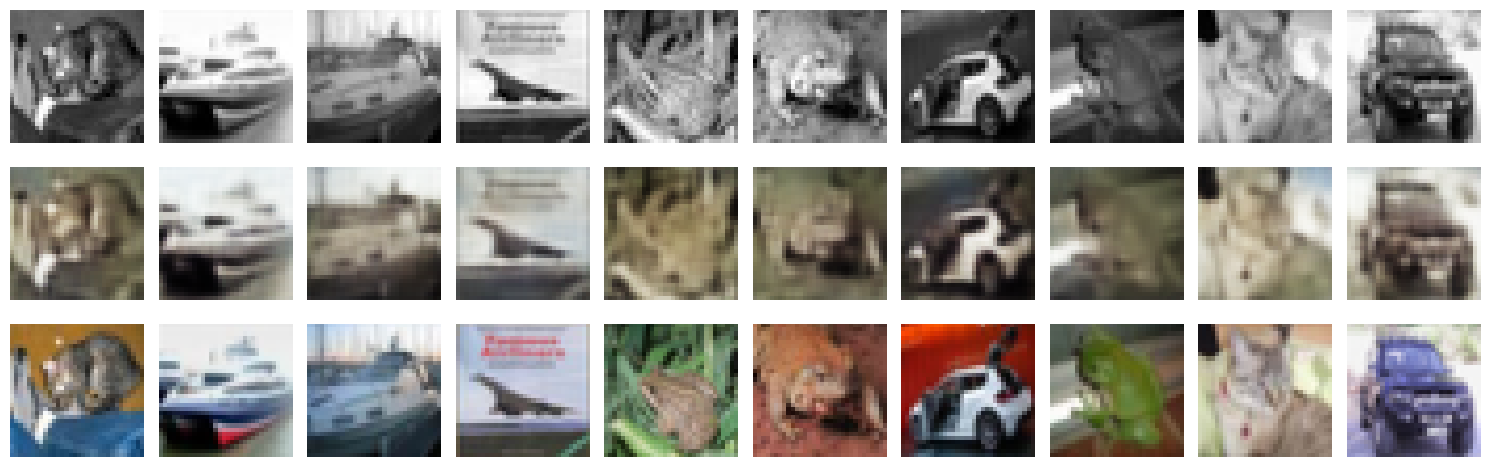

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 154s 424ms/step - loss: 0.0227 - val_loss: 0.0106
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 141s 400ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 139s 394ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 141s 402ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 141s 401ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 127s 360ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 125s 355ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 137s 388ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 139s 395ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 10/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 135s 383ms/step - loss: 0.0068 - val_loss: 0.0066
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


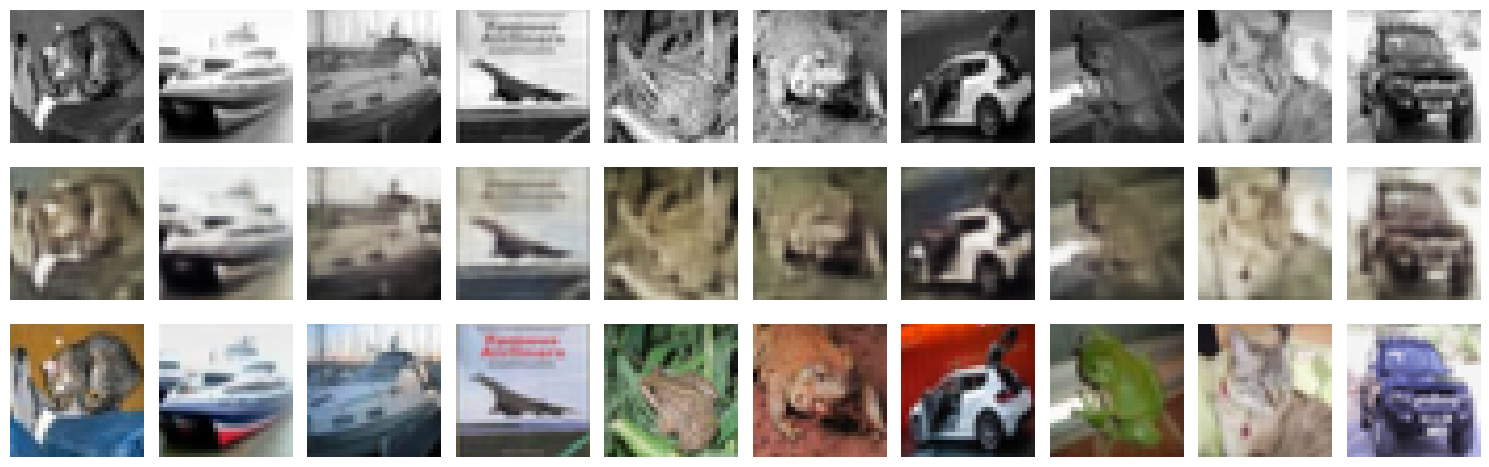

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Concatenate
from tensorflow.keras.datasets import cifar10

# Charger les données (CIFAR-10 comme exemple, convertir en niveaux de gris)
(x_train, _), (x_test, _) = cifar10.load_data()

# Normaliser les données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir en niveaux de gris
def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])[..., np.newaxis]

gray_train = rgb_to_grayscale(x_train)
gray_test = rgb_to_grayscale(x_test)

# Construire le réseau encodeur-décodeur
input_img = Input(shape=(32, 32, 1))

# Encodeur
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Décodeur
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
out_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Modèle
model = Model(input_img, out_img)
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(gray_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

# Tester le modèle
predicted_color = model.predict(gray_test[:10])

# Fonction pour afficher les résultats
def plot_images(original_gray, predicted_color, original_color):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        # Image en niveaux de gris
        plt.subplot(3, 10, i + 1)
        plt.imshow(original_gray[i].squeeze(), cmap='gray')
        plt.axis('off')

        # Image colorisée prédite
        plt.subplot(3, 10, i + 11)
        plt.imshow(predicted_color[i])
        plt.axis('off')

        # Image couleur originale
        plt.subplot(3, 10, i + 21)
        plt.imshow(original_color[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Afficher les résultats
plot_images(gray_test[:10], predicted_color, x_test[:10])
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Concatenate
from tensorflow.keras.datasets import cifar10

# Charger les données (CIFAR-10 comme exemple, convertir en niveaux de gris)
(x_train, _), (x_test, _) = cifar10.load_data()

# Normaliser les données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir en niveaux de gris
def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])[..., np.newaxis]

gray_train = rgb_to_grayscale(x_train)
gray_test = rgb_to_grayscale(x_test)

# Construire le réseau encodeur-décodeur
input_img = Input(shape=(32, 32, 1))

# Encodeur
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Décodeur
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
out_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Modèle
model = Model(input_img, out_img)
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(gray_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

# Tester le modèle
predicted_color = model.predict(gray_test[:10])

# Fonction pour afficher les résultats
def plot_images(original_gray, predicted_color, original_color):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        # Image en niveaux de gris
        plt.subplot(3, 10, i + 1)
        plt.imshow(original_gray[i].squeeze(), cmap='gray')
        plt.axis('off')

        # Image colorisée prédite
        plt.subplot(3, 10, i + 11)
        plt.imshow(predicted_color[i])
        plt.axis('off')

        # Image couleur originale
        plt.subplot(3, 10, i + 21)
        plt.imshow(original_color[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Afficher les résultats
plot_images(gray_test[:10], predicted_color, x_test[:10])

2025-01-17 14:21:45.115878: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 14:21:45.123455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 14:21:45.223760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737120105.898385 2254496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737120106.015826 2254496 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 14:22:29.450146: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Fa

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 236s 641ms/step - loss: 0.0187 - val_loss: 0.0428
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 232s 659ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 235s 657ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 223s 634ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 191s 543ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 227s 644ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 202s 575ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 224s 637ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 239s 680ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 10/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 220s 626ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 269s 638ms/step - loss: 0.0103 - val_loss: 0.0018
Epoch 2/1

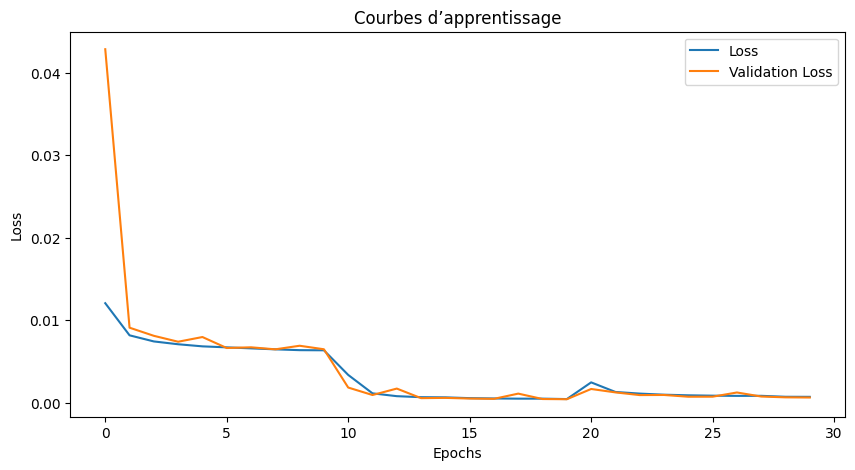

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
MSE Score: 0.008355746977031231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


332

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Concatenate, BatchNormalization
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from sklearn.model_selection import train_test_split
import gc
import cv2

# Fonction pour charger et normaliser les données de plusieurs bases de données
def load_and_prepare_datasets():
    datasets = []
    
    # CIFAR-10
    (x_train, _), (x_test, _) = cifar10.load_data()
    datasets.append((x_train, x_test))
    
    # MNIST (redimensionnement en 32x32)
    (x_train, _), (x_test, _) = mnist.load_data()
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    x_train = np.tile(x_train, (1, 1, 1, 3))
    x_test = np.tile(x_test, (1, 1, 1, 3))
    x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
    x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])
    datasets.append((x_train, x_test))
    
    # Fashion MNIST (redimensionnement en 32x32)
    (x_train, _), (x_test, _) = fashion_mnist.load_data()
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    x_train = np.tile(x_train, (1, 1, 1, 3))
    x_test = np.tile(x_test, (1, 1, 1, 3))
    x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
    x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])
    datasets.append((x_train, x_test))
    
    return datasets

# Convertir les images en niveaux de gris
def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])[..., np.newaxis]

# Construire le réseau encodeur-décodeur
def build_model(input_shape=(32, 32, 1)):
    input_img = Input(shape=input_shape)
    
    # Encodeur
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Décodeur
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    out_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    model = Model(input_img, out_img)
    model.compile(optimizer='adam', loss='mse')
    return model

# Fonction pour entraîner le modèle sur plusieurs bases de données
def train_on_multiple_datasets(model, datasets, epochs=10, batch_size=128):
    history = {'loss': [], 'val_loss': []}
    for i, (x_train, x_test) in enumerate(datasets):
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
        
        gray_train = rgb_to_grayscale(x_train)
        gray_test = rgb_to_grayscale(x_test)
        
        history_part = model.fit(gray_train, x_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
        history['loss'].extend(history_part.history['loss'])
        history['val_loss'].extend(history_part.history['val_loss'])
        
        # Libérer l'espace mémoire
        del x_train, x_test, gray_train, gray_test, history_part
        gc.collect()
    
    return history

# Fonction pour afficher les courbes d'apprentissage
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Courbes d’apprentissage')
    plt.legend()
    plt.show()

# Fonction pour calculer le MSE score
def compute_mse_score(model, x_test):
    x_test = x_test.astype('float32') / 255.0
    gray_test = rgb_to_grayscale(x_test)
    predicted_color = model.predict(gray_test)
    mse_score = np.mean((predicted_color - x_test) ** 2)
    return mse_score

# Chargement des datasets
all_datasets = load_and_prepare_datasets()

# Construction du modèle
model = build_model()

# Entraînement du modèle sur toutes les bases de données
history = train_on_multiple_datasets(model, all_datasets, epochs=10, batch_size=128)

# Affichage des courbes d'apprentissage
plot_learning_curves(history)

# Calcul du MSE score
(x_train, x_test) = all_datasets[0]
mse_score = compute_mse_score(model, x_test)
print(f'MSE Score: {mse_score}')

# Libérer l'espace mémoire
for dataset in all_datasets:
    del dataset
    gc.collect()

# Tester le modèle et afficher les résultats
x_test = x_test.astype('float32') / 255.0
gray_test = rgb_to_grayscale(x_test)
predicted_color = model.predict(gray_test[:10])

# Libérer l'espace mémoire
del x_test, gray_test
gc.collect()

